In [0]:
import tweepy
import pandas as pd
import sys
import json
consumer_key = 'Q5kScvH4J2CE6d3w8xesxT1bm'
consumer_secret = 'mlGrcssaVjN9hQMi6wI6RqWKt2LcHAEyYCGh6WF8yq20qcTb8T'
access_token = '944440837739487232-KTdrvr4vARk7RTKvJkRPUF8I4VOvGIr'
access_token_secret = 'bfHE0jC5h3B7W3H18TxV7XsofG1xuB6zeINo2DxmZ8K1W'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,compression=True)
search_words = "#Kashmir"
date_since = "2015-01-01"

#..............................................................

tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(10)
tweets

#...............................................................



In [0]:
date=[]
us=[]
o=0;
text=[]
import csv
for tweet in tweets:
    us.append(tweet)
    text.append(tweet.text)
    print(o)
    o+=1
print(o)

#..................................................................


#..................................................................




#....................................................................


import pandas as pd
df=pd.DataFrame()

id=[]
for i in range(o):
    id.append(us[i]._json['id'])
date=[]
for i in range(o):
    date.append(us[i]._json['created_at'])
user=[]
for i in range(o):
    user.append(us[i]._json['user']['screen_name'])
text=[]
for i in range(o):
    text.append(us[i]._json['text'])

df['id']=id
df['date']=date
df['user']=user
df['text']=text


retweet=[]
for i in range(o):
    a=us[i]._json['text']
    if(a[0]=="R" and a[1]=="T"):
        retweet.append("True")
    else:
        retweet.append("False")
df['retweet']=retweet

retweet_count=[]
for i in range(o):
    retweet_count.append(us[i]._json['retweet_count'])
df["retweet_count"]=retweet_count

friends_count=[]
followers_count=[]
favourites_count=[]
location=[]
source=[]
for i in range(o):
    friends_count.append(us[i]._json['user']['friends_count'])
    followers_count.append(us[i]._json['user']['followers_count'])
    favourites_count.append(us[i]._json['user']['favourites_count'])
    location.append(us[i]._json['user']['location'])
    source.append(us[i]._json['source'][-11:-4])

df['location']=location
df['source']=source
df['followers_count']=followers_count
df['friends_count']=friends_count
df['favourite_count']=favourites_count

post_by=[]
for i in range(o):
    a=us[i]._json['entities']['user_mentions']
    #print(a)
    if(a):
        post_by.append(us[i]._json['entities']['user_mentions'][0]['screen_name'])
    else:
        post_by.append("null")
df['post_by']=post_by

#............................................................................






#............................................................



#.........................................................

df

#......................


0
1
2
3
4
5
6
7
8
9
10


,id,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,1231963010824069120,Mon Feb 24 15:24:05 +0000 2020,Shashan88570151,RT @ashokepandit: Saddened by Constable #Ratan...,True,297,,Android,20,103,1241,ashokepandit
1,1231962975977689090,Mon Feb 24 15:23:56 +0000 2020,ShadabTweetss,RT @Shehla_Rashid: Notice the hugs? That's stu...,True,104,India,Android,271,338,50857,Shehla_Rashid
2,1231962968482623488,Mon Feb 24 15:23:55 +0000 2020,JD8503,RT @LetKashmirSpeak: 'Pakistan should take #Ka...,True,55,United Arab Emirates,Android,1585,2482,6280,LetKashmirSpeak
3,1231962945615253507,Mon Feb 24 15:23:49 +0000 2020,msirsiwal,RT @Shehla_Rashid: Notice the hugs? That's stu...,True,104,"Indore, India",Web App,14656,4610,11368,Shehla_Rashid
4,1231962935754469376,Mon Feb 24 15:23:47 +0000 2020,chaupaaukhau,RT @Shehla_Rashid: Notice the hugs? That's stu...,True,104,,Android,304,2499,20388,Shehla_Rashid
5,1231962915172945921,Mon Feb 24 15:23:42 +0000 2020,DrTanvirAkhtar1,RT @AalyaKashmiri: #PakRisingEndiaSinking\nInt...,True,74,"Lahore, Pakistan",Android,1377,1504,24607,AalyaKashmiri
6,1231962894247645184,Mon Feb 24 15:23:37 +0000 2020,saami_na,RT @AnthroHaley: Join us for a panel discussio...,True,53,Vancouver CANADA,Android,414,167,2206,AnthroHaley
7,1231962866535682048,Mon Feb 24 15:23:30 +0000 2020,sdnazeerhussain,RT @Shehla_Rashid: Notice the hugs? That's stu...,True,104,"Hyderabad, India",Android,156,1088,27746,Shehla_Rashid
8,1231962855773278208,Mon Feb 24 15:23:28 +0000 2020,RahilBhat06,"RT @trtworld: Badr-un-Nisa, a #Kashmiri mother...",True,73,occupied kashmir,Android,60,55,8978,trtworld
9,1231962853348978695,Mon Feb 24 15:23:27 +0000 2020,khan_maha9,"RT @trtworld: Badr-un-Nisa, a #Kashmiri mother...",True,73,,Android,36,118,3928,trtworld


In [0]:
df.head(n=2)

,id,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,1231963010824069120,Mon Feb 24 15:24:05 +0000 2020,Shashan88570151,RT @ashokepandit: Saddened by Constable #Ratan...,True,297,,Android,20,103,1241,ashokepandit
1,1231962975977689090,Mon Feb 24 15:23:56 +0000 2020,ShadabTweetss,RT @Shehla_Rashid: Notice the hugs? That's stu...,True,104,India,Android,271,338,50857,Shehla_Rashid


In [0]:
df['date']

0    Mon Feb 24 15:24:05 +0000 2020
1    Mon Feb 24 15:23:56 +0000 2020
2    Mon Feb 24 15:23:55 +0000 2020
3    Mon Feb 24 15:23:49 +0000 2020
4    Mon Feb 24 15:23:47 +0000 2020
5    Mon Feb 24 15:23:42 +0000 2020
6    Mon Feb 24 15:23:37 +0000 2020
7    Mon Feb 24 15:23:30 +0000 2020
8    Mon Feb 24 15:23:28 +0000 2020
9    Mon Feb 24 15:23:27 +0000 2020
Name: date, dtype: object

In [0]:
datetime?

In [0]:
df['date']

0    Mon Feb 24 15:24:05 +0000 2020
1    Mon Feb 24 15:23:56 +0000 2020
2    Mon Feb 24 15:23:55 +0000 2020
3    Mon Feb 24 15:23:49 +0000 2020
4    Mon Feb 24 15:23:47 +0000 2020
5    Mon Feb 24 15:23:42 +0000 2020
6    Mon Feb 24 15:23:37 +0000 2020
7    Mon Feb 24 15:23:30 +0000 2020
8    Mon Feb 24 15:23:28 +0000 2020
9    Mon Feb 24 15:23:27 +0000 2020
Name: date, dtype: object

In [0]:
a=df['date'].values.tolist()

In [0]:
a

['Mon Feb 24 15:24:05 +0000 2020',
 'Mon Feb 24 15:23:56 +0000 2020',
 'Mon Feb 24 15:23:55 +0000 2020',
 'Mon Feb 24 15:23:49 +0000 2020',
 'Mon Feb 24 15:23:47 +0000 2020',
 'Mon Feb 24 15:23:42 +0000 2020',
 'Mon Feb 24 15:23:37 +0000 2020',
 'Mon Feb 24 15:23:30 +0000 2020',
 'Mon Feb 24 15:23:28 +0000 2020',
 'Mon Feb 24 15:23:27 +0000 2020']

In [0]:
type(a[0])

str

In [0]:
b=df['followers_count'].values.tolist()

In [0]:
b

[20, 271, 1585, 14656, 304, 1377, 414, 156, 60, 36]

In [0]:
type(b[0])

int

In [0]:
b[0]+b[1]

291

In [0]:
c=[]
c.append(b[0])
for i in range(1,len(b)):
  c.append(c[i-1]+b[i])

In [0]:
c

[20, 291, 1876, 16532, 16836, 18213, 18627, 18783, 18843, 18879]

In [0]:
a=[]
for i in range(len(b)):
  a.append(i)

In [0]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [0]:
import pandas as pd
df=pd.read_csv('Datawarehouse.csv')


In [0]:
df

,id,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,1231611279967539200,Sun Feb 23 16:06:26 +0000 2020,journoabubakar,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Sopore, Jammu And Kashmir",Android,1714,222,1329,ShamsIrfan27
1,1231611227513618445,Sun Feb 23 16:06:13 +0000 2020,ThatKashmirGuy,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Kulgam, Jammu And Kashmir",Android,3254,54,208,ShamsIrfan27
2,1231611222891560961,Sun Feb 23 16:06:12 +0000 2020,mittoonkhan,RT @PTIofficial: Arundhati Roy isn’t much wron...,True,18,"Southampton, England",Android,1513,117,369901,PTIofficial
3,1231611181418176512,Sun Feb 23 16:06:02 +0000 2020,abbasqamar_,RT @zari_pakistani: Kashmiris Use Memes to Moc...,True,12,NaN,Web App,342,1987,30411,zari_pakistani
4,1231611142088396800,Sun Feb 23 16:05:53 +0000 2020,LoverPakArmy,RT @Husnain4s_: 200+ days of lockdown in #Kash...,True,5,FORT OF ISLAM🇵🇰,Android,10801,11249,22886,Husnain4s_
...,...,...,...,...,...,...,...,...,...,...,...,...
23397,1230411188149768192,Thu Feb 20 08:37:41 +0000 2020,hakeem_muzamil,"RT @Samiyalatief: My blood boils, my heart cri...",True,148,"New Delhi, India",iPhone,146,50,1075,Samiyalatief
23398,1230411161184673792,Thu Feb 20 08:37:35 +0000 2020,KashurTweets,"The woods are lovely, dark and deep. But I hav...",False,2,Jammu And Kashmir,Android,2125,167,3453,NaN
23399,1230411100681719809,Thu Feb 20 08:37:20 +0000 2020,hakeem_muzamil,RT @toronto4kashmir: While we talk of the pres...,True,97,"New Delhi, India",iPhone,146,50,1075,toronto4kashmir
23400,1230411036639014912,Thu Feb 20 08:37:05 +0000 2020,DeepakT21049945,RT @shazia_111: @nailainayat Vegetable vendors...,True,10,"Bihar, India",Android,17,99,1447,shazia_111


In [0]:
b=df['followers_count'].values.tolist()

In [0]:
c=[]
c.append(b[0])
for i in range(1,len(b)):
  c.append(c[i-1]+b[i])

In [0]:
c[len(b)-1]

239064617

In [0]:
a=df['date'].values.tolist()

In [0]:
df['date']

0        Sun Feb 23 16:06:26 +0000 2020
1        Sun Feb 23 16:06:13 +0000 2020
2        Sun Feb 23 16:06:12 +0000 2020
3        Sun Feb 23 16:06:02 +0000 2020
4        Sun Feb 23 16:05:53 +0000 2020
                      ...              
23397    Thu Feb 20 08:37:41 +0000 2020
23398    Thu Feb 20 08:37:35 +0000 2020
23399    Thu Feb 20 08:37:20 +0000 2020
23400    Thu Feb 20 08:37:05 +0000 2020
23401    Thu Feb 20 08:36:43 +0000 2020
Name: date, Length: 23402, dtype: object

In [0]:
date=df['date'].values.tolist()

In [0]:
date

['Sun Feb 23 16:06:26 +0000 2020',
 'Sun Feb 23 16:06:13 +0000 2020',
 'Sun Feb 23 16:06:12 +0000 2020',
 'Sun Feb 23 16:06:02 +0000 2020',
 'Sun Feb 23 16:05:53 +0000 2020',
 'Sun Feb 23 16:05:44 +0000 2020',
 'Sun Feb 23 16:05:23 +0000 2020',
 'Sun Feb 23 16:04:50 +0000 2020',
 'Sun Feb 23 16:04:45 +0000 2020',
 'Sun Feb 23 16:04:43 +0000 2020',
 'Sun Feb 23 16:04:41 +0000 2020',
 'Sun Feb 23 16:04:28 +0000 2020',
 'Sun Feb 23 16:04:22 +0000 2020',
 'Sun Feb 23 16:04:20 +0000 2020',
 'Sun Feb 23 16:04:18 +0000 2020',
 'Sun Feb 23 16:04:12 +0000 2020',
 'Sun Feb 23 16:04:09 +0000 2020',
 'Sun Feb 23 16:03:52 +0000 2020',
 'Sun Feb 23 16:03:48 +0000 2020',
 'Sun Feb 23 16:03:46 +0000 2020',
 'Sun Feb 23 16:03:33 +0000 2020',
 'Sun Feb 23 16:03:30 +0000 2020',
 'Sun Feb 23 16:03:29 +0000 2020',
 'Sun Feb 23 16:03:16 +0000 2020',
 'Sun Feb 23 16:03:03 +0000 2020',
 'Sun Feb 23 16:03:03 +0000 2020',
 'Sun Feb 23 16:03:00 +0000 2020',
 'Sun Feb 23 16:02:55 +0000 2020',
 'Sun Feb 23 16:02:5

In [0]:
date1=date[:1000]
c1=c[:1000]

In [0]:
d=[]

In [0]:
d.append(c[4925])
d.append(c[5511])
d.append(c[9279])
d.append(c[12384])
d.append(c[15629])
d.append(c[18381])
d.append(c[22174])
d.append(c[23401])



In [0]:
d

[77300866,
 91982865,
 126224537,
 169340606,
 189685041,
 216202542,
 230894723,
 239064617]

In [0]:
date=["Thu Feb 20 00:00"," Thu 20 12:00","Fri Feb 21 00:00","Fri Feb 21 12:00","Sat Feb 22 00:00","Sat Feb 22 12:00","Sun Feb 23 00:00","Sun Feb 23 12:00"]

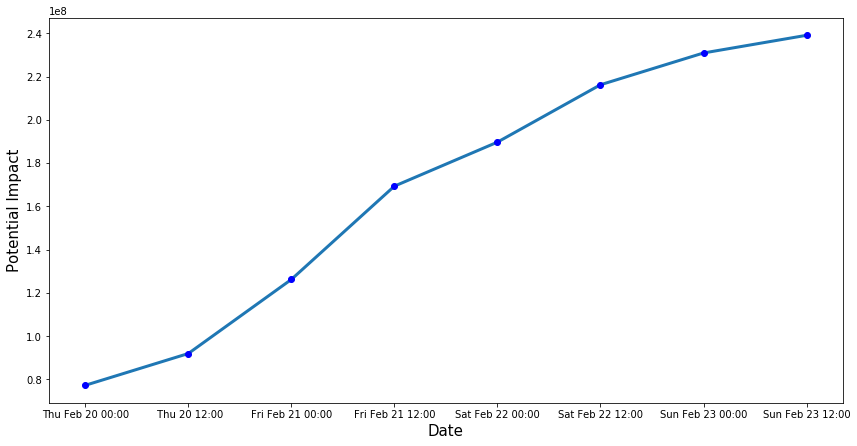

In [0]:
plt.plot(date,d,linewidth=3)
plt.plot(date,d,'bo')
plt.xlabel('Date',size=15)
plt.ylabel("Potential Impact",size=15)
plt.tight_layout(pad=0,rect=(1,2,3,3.5))
plt.show()

In [0]:
plt.xlabel?

In [0]:
from collections import Counter

In [0]:
aa=df['retweet'].values.tolist()

In [0]:
len(aa)

23402

In [0]:
aa1=aa[0:4925]

In [0]:
aa1=Counter(aa1)

In [0]:
aa1

Counter({False: 1167, True: 3758})

In [0]:
tweets1=aa1[0]

In [0]:
retweets1=aa1[1]

In [0]:
print(tweets1,retweets1)

1167 3758


In [0]:
aa2=aa[4926:5511]
aa2=Counter(aa2)
print(aa2)




Counter({True: 474, False: 111})


In [0]:
tweets2=aa2[0]
retweets2=aa2[1]
print(tweets2,retweets2)

111 474


In [0]:
aa3=aa[5512:9279]
aa3=Counter(aa3)
print(aa3)




Counter({True: 3070, False: 697})


In [0]:
tweets3=aa3[0]
retweets3=aa3[1]
print(tweets3,retweets3)

697 3070


In [0]:
aa4=aa[9280:12384]
aa4=Counter(aa4)
print(aa4)




Counter({True: 2597, False: 507})


In [0]:
tweets4=aa4[0]
retweets4=aa4[1]
print(tweets4,retweets4)

507 2597


In [0]:
aa5=aa[12385:15629]
aa5=Counter(aa5)
print(aa5)




Counter({True: 2720, False: 524})


In [0]:
tweets5=aa5[0]
retweets5=aa5[1]
print(tweets5,retweets5)

524 2720


In [0]:
aa6=aa[15630:18381]
aa6=Counter(aa6)
print(aa6)




Counter({True: 2028, False: 723})


In [0]:
tweets6=aa6[0]
retweets6=aa6[1]
print(tweets6,retweets6)

723 2028


In [0]:
aa7=aa[18382:22174]
aa7=Counter(aa7)
print(aa7)




Counter({True: 2974, False: 818})


In [0]:
tweets7=aa7[0]
retweets7=aa7[1]
print(tweets7,retweets7)

818 2974


In [0]:
aa8=aa[22175:23401]
aa8=Counter(aa8)
print(aa8)




Counter({True: 1013, False: 213})


In [0]:
tweets8=aa8[0]
retweets8=aa8[1]
print(tweets8,retweets8)

213 1013


In [0]:
tweet_list=[tweets1,tweets2,tweets3,tweets4,tweets5,tweets6,tweets7,tweets8]
retweet_list=[retweets1,retweets2,retweets3,retweets4,retweets5,retweets6,retweets7,retweets8]

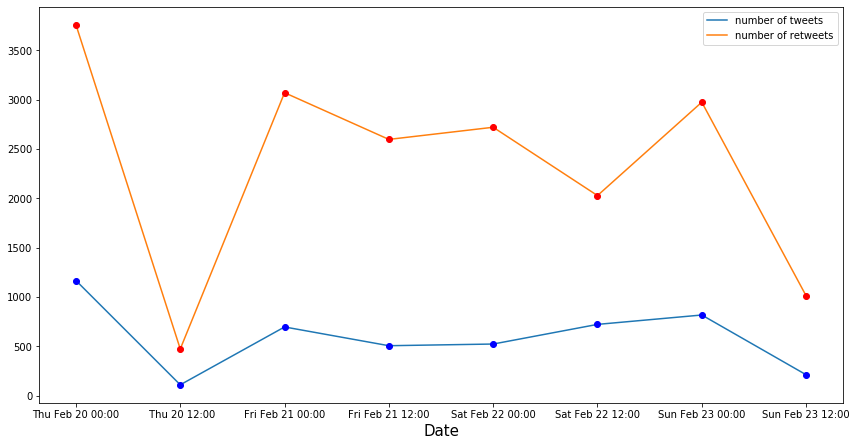

In [0]:
plt.plot(date,tweet_list,label='number of tweets')
plt.plot(date,tweet_list,'bo')
plt.plot(date,retweet_list,label='number of retweets')
plt.plot(date,retweet_list,'ro')
plt.xlabel('Date',size=15)
plt.tight_layout(pad=0,rect=(1,2,3,3.5))
plt.legend()
plt.show()

In [0]:
print('Nice Work')

Nice Work


In [0]:
c=df['followers_count'].values.tolist()

In [0]:
cc1=c[0:4925]
cc2=c[4926:5511]
cc3=c[5512:9279]
cc4=c[9280:12384]
cc5=c[12385:15629]
cc6=c[15630:18381]
cc7=c[18382:22174]
cc8=c[22175:23401]

In [0]:
import numpy as np

In [0]:
cc11=np.sum(cc1)

In [0]:
cc11=np.sum(cc1)
cc22=np.sum(cc2)
cc33=np.sum(cc3)
cc44=np.sum(cc4)
cc55=np.sum(cc5)
cc66=np.sum(cc6)
cc77=np.sum(cc7)
cc88=np.sum(cc8)

In [0]:
cc11+cc22+cc33+cc44+cc55+cc66+cc77+cc88

239025384

# New Section

In [0]:
impact=[cc11,cc22,cc33,cc44,cc55,cc66,cc77,cc88]

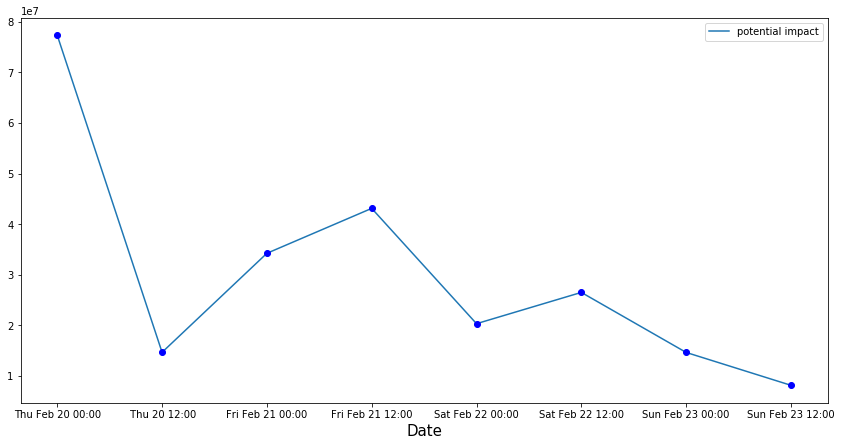

In [0]:
plt.plot(date,impact,label='potential impact')
plt.plot(date,impact,'bo')
plt.xlabel('Date',size=15)
plt.tight_layout(pad=0,rect=(1,2,3,3.5))
plt.legend()
plt.show()

In [0]:
import matplotlib.pyplot as plt


In [0]:
df=pd.read_csv('Datawarehouse.csv')

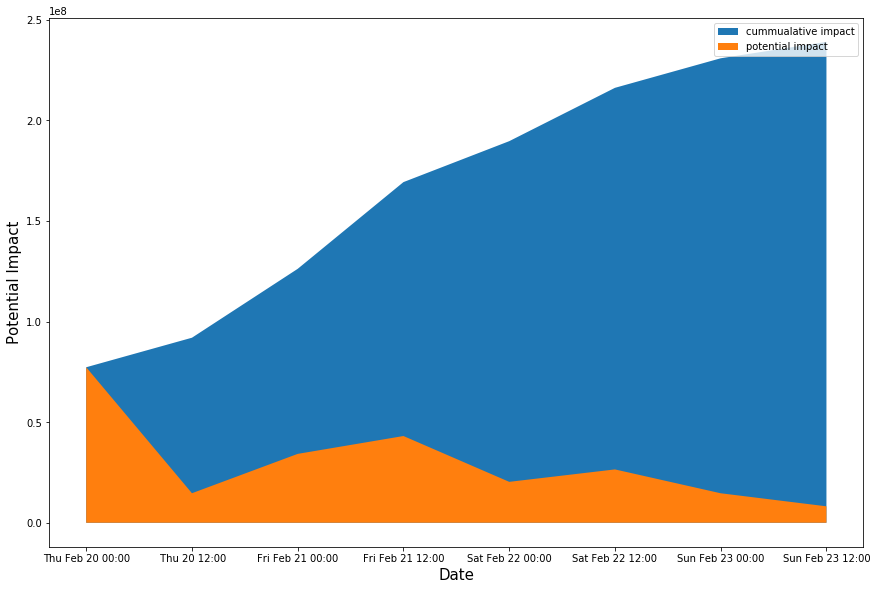

In [0]:
plt.fill_between(date,0,d,label='cummualative impact')
#plt.plot(date,d,'bo')
plt.xlabel('Date',size=15)
plt.ylabel("Potential Impact",size=15)
plt.tight_layout(pad=0,rect=(1,2,3,4))
plt.fill_between(date,impact,label='potential impact')
#plt.plot(date,impact,'ro')
plt.xlabel('Date',size=15)
plt.tight_layout(pad=0,rect=(1,2,3,4))

plt.legend()
plt.show()

In [0]:
df.head(n=2)

,id,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,1231611279967539200,Sun Feb 23 16:06:26 +0000 2020,journoabubakar,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Sopore, Jammu And Kashmir",Android,1714,222,1329,ShamsIrfan27
1,1231611227513618445,Sun Feb 23 16:06:13 +0000 2020,ThatKashmirGuy,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Kulgam, Jammu And Kashmir",Android,3254,54,208,ShamsIrfan27


In [0]:
dff=df.to_dict()

In [0]:
uni=[]
uniqq=[]
for i in range(23402):
  if dff['user'][i] not in uni :
    uni.append(dff['user'][i])
    uniqq.append(dff['followers_count'][i])

In [0]:
len(uni)

12656

In [0]:
newdf=pd.DataFrame()

In [0]:
newdf['user']=uni

In [0]:
newdf['follower_count']=uniqq

In [0]:
newdf.head(n=5)

,user,follower_count
0,journoabubakar,1714
1,ThatKashmirGuy,3254
2,mittoonkhan,1513
3,abbasqamar_,342
4,LoverPakArmy,10801


In [0]:
newnewdf=newdf.sort_values('follower_count',ascending=False)

In [0]:
newnewdf

,user,follower_count
9604,adgpi,6372818
3912,HamidMirPAK,5930084
144,the_hindu,5760961
5860,IndiaToday,5279313
700,PTIofficial,4733498
...,...,...
3726,Ameer91506533,0
3723,GivingYadav1,0
3694,Veer22964654,0
2589,ahumanenough,0


In [0]:
a=newnewdf['follower_count'].values

In [0]:
type(a)

numpy.ndarray

In [0]:
follower_sum=np.sum(a)

In [0]:
follower_sum

86073627

In [0]:
follower_avg=follower_sum/len(total_followers)

In [0]:
print(follower_avg)

6801.0135113780025

In [0]:
df.head(n=2)

,id,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,1231611279967539200,Sun Feb 23 16:06:26 +0000 2020,journoabubakar,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Sopore, Jammu And Kashmir",Android,1714,222,1329,ShamsIrfan27
1,1231611227513618445,Sun Feb 23 16:06:13 +0000 2020,ThatKashmirGuy,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Kulgam, Jammu And Kashmir",Android,3254,54,208,ShamsIrfan27


In [0]:
c=df['retweet'].values

In [0]:
from collections import Counter

In [0]:
c=Counter(c)

In [0]:
c

Counter({False: 4763, True: 18639})

In [0]:
## kitne tweet and kitne retweet

In [0]:
fdf=df.sort_values('retweet',ascending=True)

In [0]:
fdf

,id,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
4022,1231470424833261570,Sun Feb 23 06:46:43 +0000 2020,iammogliii,@LetsVpn showing some support to the Kashmiri ...,False,0,Jungle of Humans,Android,200,115,823,LetsVpn
4812,1231438170824286209,Sun Feb 23 04:38:33 +0000 2020,KASHMlRandME,India’s launching the war is a certainty certa...,False,6,Azad Jammu Kashmir,Android,1185,302,716,NaN
19732,1230544840015912960,Thu Feb 20 17:28:46 +0000 2020,carin__fischer,@HerNameIs_Bea's account has been withheld in ...,False,399,"Washington, DC",Client,12775,1315,30834,NaN
19733,1230544827340775424,Thu Feb 20 17:28:43 +0000 2020,Faizanbukharii,They asked me for drugs . \n So i told ...,False,1,Chandigarh/Srinagar,Web App,142,125,2719,NaN
19734,1230544765906771970,Thu Feb 20 17:28:29 +0000 2020,Rahilkash,@carin__fischer If u understands Hindi then do...,False,0,Jammu And Kashmir,Android,46,106,858,carin__fischer
...,...,...,...,...,...,...,...,...,...,...,...,...
8842,1231204696687181824,Sat Feb 22 13:10:49 +0000 2020,ashish20188,RT @PatharBaaz: 🚨The swag of locals in #Kashmi...,True,179,NaN,Android,203,317,41083,PatharBaaz
8840,1231204753063006209,Sat Feb 22 13:11:02 +0000 2020,johar12696336,RT @imMAK02: 202 DAYS of Lockdown in Kashmir.\...,True,412,NaN,iPhone,114,298,33652,imMAK02
8839,1231204763632590850,Sat Feb 22 13:11:04 +0000 2020,Aliza_JK_,RT @SardarToqeer12: #زندہ_ہے_کشمیر\nIt's been ...,True,12,Jammu Kashmir Sirinagr,Android,127,62,40,SardarToqeer12
8860,1231203830836187139,Sat Feb 22 13:07:22 +0000 2020,SAIMVIRK2,"RT @Aahmedbq: Today, my aunt happened to see m...",True,57,"سرگودھا, پاکستان",Android,61,148,647,Aahmedbq


In [0]:
import pandas as pd




In [0]:
df=pd.read_csv("Datawarehouse (1).csv")

In [0]:
df.head(5)

,id,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,1231611279967539200,Sun Feb 23 16:06:26 +0000 2020,journoabubakar,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Sopore, Jammu And Kashmir",Android,1714,222,1329,ShamsIrfan27
1,1231611227513618445,Sun Feb 23 16:06:13 +0000 2020,ThatKashmirGuy,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Kulgam, Jammu And Kashmir",Android,3254,54,208,ShamsIrfan27
2,1231611222891560961,Sun Feb 23 16:06:12 +0000 2020,mittoonkhan,RT @PTIofficial: Arundhati Roy isn’t much wron...,True,18,"Southampton, England",Android,1513,117,369901,PTIofficial
3,1231611181418176512,Sun Feb 23 16:06:02 +0000 2020,abbasqamar_,RT @zari_pakistani: Kashmiris Use Memes to Moc...,True,12,NaN,Web App,342,1987,30411,zari_pakistani
4,1231611142088396800,Sun Feb 23 16:05:53 +0000 2020,LoverPakArmy,RT @Husnain4s_: 200+ days of lockdown in #Kash...,True,5,FORT OF ISLAM🇵🇰,Android,10801,11249,22886,Husnain4s_


In [0]:
dff=df.to_dict()

In [0]:
#unique user
#reach
uni=[]
date=[]
sum=0
for i in range(23402):
    if dff['user'][i] not in uni:
        uni.append(dff['user'][i])
        sum+=dff['followers_count'][i]
        date.append(dff['date'][i])

In [0]:
sum

86073627

In [0]:
date

['Sun Feb 23 16:06:26 +0000 2020',
 'Sun Feb 23 16:06:13 +0000 2020',
 'Sun Feb 23 16:06:12 +0000 2020',
 'Sun Feb 23 16:06:02 +0000 2020',
 'Sun Feb 23 16:05:53 +0000 2020',
 'Sun Feb 23 16:05:44 +0000 2020',
 'Sun Feb 23 16:05:23 +0000 2020',
 'Sun Feb 23 16:04:50 +0000 2020',
 'Sun Feb 23 16:04:45 +0000 2020',
 'Sun Feb 23 16:04:43 +0000 2020',
 'Sun Feb 23 16:04:41 +0000 2020',
 'Sun Feb 23 16:04:28 +0000 2020',
 'Sun Feb 23 16:04:20 +0000 2020',
 'Sun Feb 23 16:04:18 +0000 2020',
 'Sun Feb 23 16:04:12 +0000 2020',
 'Sun Feb 23 16:04:09 +0000 2020',
 'Sun Feb 23 16:03:52 +0000 2020',
 'Sun Feb 23 16:03:48 +0000 2020',
 'Sun Feb 23 16:03:46 +0000 2020',
 'Sun Feb 23 16:03:33 +0000 2020',
 'Sun Feb 23 16:03:30 +0000 2020',
 'Sun Feb 23 16:03:03 +0000 2020',
 'Sun Feb 23 16:03:03 +0000 2020',
 'Sun Feb 23 16:03:00 +0000 2020',
 'Sun Feb 23 16:02:55 +0000 2020',
 'Sun Feb 23 16:02:50 +0000 2020',
 'Sun Feb 23 16:02:45 +0000 2020',
 'Sun Feb 23 16:02:35 +0000 2020',
 'Sun Feb 23 16:02:3

In [0]:
import tweepy
import pandas as pd
access_token = "944440837739487232-KTdrvr4vARk7RTKvJkRPUF8I4VOvGIr"
access_token_secret = "bfHE0jC5h3B7W3H18TxV7XsofG1xuB6zeINo2DxmZ8K1W"
consumer_key = "Q5kScvH4J2CE6d3w8xesxT1bm"
consumer_secret = "mlGrcssaVjN9hQMi6wI6RqWKt2LcHAEyYCGh6WF8yq20qcTb8T"
col1=[]
col2=[]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,compression=True)

for user in tweepy.Cursor(api.friends, screen_name="hasanminhaj").items(400):
    print(user.screen_name)
    col1.append("hasanminhaj")
    col2.append(user.screen_name) 

chrissyteigen
mitchrichmond23
ninaemlemdi
Jon_Favreau
drsanjaygupta
MattGertz
JasonSCampbell
jkbjournalist
tomhanks
HillaryClinton
anitakumar01
BoysClubNY
dmaq1
ChrisEvans
SarahxAnwer
Casey
martinandanar
MarkRuffalo
TheEllenShow
johnaugust
KimKap
55buckets
SopanDeb
BetsyHodges
leeunkrich
bessbell
ezraklein
AOC
petrodraiz
chamath
sophchang
priyankachopra
voxdotcom
TiffanyHaddish
adriangrenier
jessetyler
johnlegend
alyankovic
perlmutations
jonnysun
nikolajcw
GabbySidibe
adampally
JasonRitter
kenjeong
pronounced_ing
ColeEscola
shresnik
zach_r1ce
JayPharoah
SacramentoKings
TVietor08
jaboukie
TheSamhita
tomsegura
jimmykimmel
gabegundacker
THEKIDMERO
Genius
brandonjinx
SheilaVee
jackwhitehall
russellhoward
dstfelix
yogrishiramdev
umxrshk
kporzee
EnesKanter
jennyhan
jenflanz
hodakatebi
patriotact
davidiserson
TheDweck
thatchriskelly
Jokoy
N_C_B
RonnieFieg
attell
KobiLibii
MB3FIVE
ACLU
BarackObama
nytimes
maddow
Sethrogen
bananapeele
kathygriffin
knguyen
GQMagazine
franciaraisa
BlairImani
AMAN

Rate limit reached. Sleeping for: 869


joshluber
nathanfielder
djkhaled
ayeshacurry
MazMHussain
davidfolkenflik
JensenKarp
michaelb4jordan
JordanPeele
MattHalfhill
IanMcKellen
iraglass
El_Silvero
JLaPuma
anildash
rameswaram
AllOfItWNYC
thismyshow
EugeneMirman
ShahanR
NinaDavuluri
GrantNapearshow
CarmichaelDave
EliseCz
Andrea_Simmons
showtoones
electrolemon
iamcolinquinn
abrahamjoseph
bfishbfish
SpecialRepMC
fannynordmark
JRHavlan
ambarella
deray
hugoandmarie
IStandWithAhmed
showmetheravi
DesiLydic
roywoodjr
ronnychieng
fakedansavage
chrislhayes
twitney
humansofny
Lin_Manuel
mdotbrown
PinnapplePower
ChrisGethard
EasyPri
oldmanebro
marcecko
eugcordero
Iam1Cent
ajjacobs
melissamccarthy
TaheraHAhmad
patthewanderer
saladinahmed
SamSpratt
jamesmiglehart
AkilahObviously
tompapa
phlaimeaux
GBerlanti
AngeloLozada66
rojoperezzz
prattprattpratt
dherzog77
talkhoops
VRam_21
heavenrants
rastphan
jsmooth995
ComedyGroupie
chrizmillr
YourAnonNews
LuciaAniello
Babyballs69
paulfeig
GlitterCheese
mojorojo
BinaShah
ismat
RonanFarrow
tejucole
Ze

In [0]:
col1

['hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanm

In [0]:
col2

['chrissyteigen',
 'mitchrichmond23',
 'ninaemlemdi',
 'Jon_Favreau',
 'drsanjaygupta',
 'MattGertz',
 'JasonSCampbell',
 'jkbjournalist',
 'tomhanks',
 'HillaryClinton',
 'anitakumar01',
 'BoysClubNY',
 'dmaq1',
 'ChrisEvans',
 'SarahxAnwer',
 'Casey',
 'martinandanar',
 'MarkRuffalo',
 'TheEllenShow',
 'johnaugust',
 'KimKap',
 '55buckets',
 'SopanDeb',
 'BetsyHodges',
 'leeunkrich',
 'bessbell',
 'ezraklein',
 'AOC',
 'petrodraiz',
 'chamath',
 'sophchang',
 'priyankachopra',
 'voxdotcom',
 'TiffanyHaddish',
 'adriangrenier',
 'jessetyler',
 'johnlegend',
 'alyankovic',
 'perlmutations',
 'jonnysun',
 'nikolajcw',
 'GabbySidibe',
 'adampally',
 'JasonRitter',
 'kenjeong',
 'pronounced_ing',
 'ColeEscola',
 'shresnik',
 'zach_r1ce',
 'JayPharoah',
 'SacramentoKings',
 'TVietor08',
 'jaboukie',
 'TheSamhita',
 'tomsegura',
 'jimmykimmel',
 'gabegundacker',
 'THEKIDMERO',
 'Genius',
 'brandonjinx',
 'SheilaVee',
 'jackwhitehall',
 'russellhoward',
 'dstfelix',
 'yogrishiramdev',
 'umxr

In [0]:
df = pd.DataFrame(index=None)
df["source"]=col1
df["target"]=col2
print(df)
df.to_csv('fs.csv',index=False)

          source           target
0    hasanminhaj    chrissyteigen
1    hasanminhaj  mitchrichmond23
2    hasanminhaj      ninaemlemdi
3    hasanminhaj      Jon_Favreau
4    hasanminhaj    drsanjaygupta
..           ...              ...
395  hasanminhaj          Mowjood
396  hasanminhaj       Trevornoah
397  hasanminhaj        jinajones
398  hasanminhaj       AdamLowitt
399  hasanminhaj    jordanklepper

[400 rows x 2 columns]


In [0]:
df

,source,target
0,hasanminhaj,chrissyteigen
1,hasanminhaj,mitchrichmond23
2,hasanminhaj,ninaemlemdi
3,hasanminhaj,Jon_Favreau
4,hasanminhaj,drsanjaygupta
...,...,...
395,hasanminhaj,Mowjood
396,hasanminhaj,Trevornoah
397,hasanminhaj,jinajones
398,hasanminhaj,AdamLowitt


In [0]:
c=4
slp=0
friend = col2.copy()
col3=[]

for i in friend[c:]:
    print(c)
    c=c+1
    col3.append(i)
    for j in friend[c:]:
        friendship=api.show_friendship(source_screen_name=i, target_screen_name=j)
        if(friendship[0].followed_by):
            print(j,i) # i followed by j
            df.loc[len(df)]=[j,i]
            df.to_csv('fs.csv',index=False)
        if(friendship[1].followed_by):
            print(i,j) # j followed by i
            df.loc[len(df)]=[i,j]
            df.to_csv('fs.csv',index=False)

Rate limit reached. Sleeping for: 45


4
ChrisEvans drsanjaygupta
TheEllenShow drsanjaygupta
SopanDeb drsanjaygupta
petrodraiz drsanjaygupta
kenjeong drsanjaygupta
SheilaVee drsanjaygupta
thatchriskelly drsanjaygupta
BarackObama drsanjaygupta
drsanjaygupta nytimes
Sethrogen drsanjaygupta
FullFrontalSamB drsanjaygupta
colbertlateshow drsanjaygupta
DevDell drsanjaygupta
franklinleonard drsanjaygupta
aliamjadrizvi drsanjaygupta
drsanjaygupta realDonaldTrump
ajv drsanjaygupta


Rate limit reached. Sleeping for: 864


amritsingh drsanjaygupta
joshrogin drsanjaygupta
MrGeorgeWallace drsanjaygupta
SenSanders drsanjaygupta
AnandWrites drsanjaygupta
NickKristof drsanjaygupta
ShahanR drsanjaygupta
Andrea_Simmons drsanjaygupta
showmetheravi drsanjaygupta
oldmanebro drsanjaygupta
tompapa drsanjaygupta
lsarsour drsanjaygupta
AymanM drsanjaygupta
drsanjaygupta iamjohnoliver


Rate limit reached. Sleeping for: 864


Variety drsanjaygupta
philiplord drsanjaygupta
mileskahn drsanjaygupta
mattkoff drsanjaygupta
5
JasonSCampbell MattGertz
MattGertz JasonSCampbell
MattGertz HillaryClinton
anitakumar01 MattGertz
SopanDeb MattGertz
MattGertz SopanDeb
MattGertz ezraklein
MattGertz AOC
MattGertz voxdotcom
MattGertz TVietor08
TheDweck MattGertz
MattGertz ACLU
MattGertz BarackObama
MattGertz nytimes
maddow MattGertz
DevDell MattGertz
seanogallagher MattGertz
heymichellelee MattGertz
franklinleonard MattGertz


Rate limit reached. Sleeping for: 865


MattGertz realDonaldTrump
VanJones68 MattGertz
MattGertz alexwagner
joshrogin MattGertz
MattGertz joshrogin
MattGertz ringer
mehdirhasan MattGertz
MattGertz SenSanders
MattGertz AnandWrites
davidfolkenflik MattGertz
MattGertz davidfolkenflik
MattGertz anildash
abrahamjoseph MattGertz
MattGertz chrislhayes
MattGertz Lin_Manuel


Rate limit reached. Sleeping for: 864


KeyboardInterrupt: ignored

In [0]:
c=25

slp=0
friend = col2.copy()
col3=[]

for i in friend[c:]:
    print(c)
    c=c+1
    col3.append(i)
    for j in friend[c:]:
        friendship=api.show_friendship(source_screen_name=i, target_screen_name=j)
        if(friendship[0].followed_by):
            print(j,i) # i followed by j
            df.loc[len(df)]=[j,i]
            df.to_csv('fs.csv',index=False)
        if(friendship[1].followed_by):
            print(i,j) # j followed by i
            df.loc[len(df)]=[i,j]
            df.to_csv('fs.csv',index=False)

Rate limit reached. Sleeping for: 7


20
SopanDeb KimKap
KimKap SopanDeb
KimKap bessbell
KimKap ezraklein
KimKap TiffanyHaddish
KimKap THEKIDMERO
KimKap patriotact
KimKap ACLU
KimKap BarackObama
KimKap nytimes
KimKap Sethrogen
KimKap kathygriffin
KimKap GQMagazine
KimKap StephenAtHome
KimKap ColinJost
KimKap billyeichner
KimKap JimGaffigan
KimKap finkd
KimKap BRANDONWARDELL


Rate limit reached. Sleeping for: 863


KeyboardInterrupt: ignored

In [0]:
c=30

slp=0
friend = col2.copy()
col3=[]

for i in friend[c:]:
    print(c)
    c=c+1
    col3.append(i)
    for j in friend[c:]:
        friendship=api.show_friendship(source_screen_name=i, target_screen_name=j)
        if(friendship[0].followed_by):
            print(j,i) # i followed by j
            df.loc[len(df)]=[j,i]
            df.to_csv('fs.csv',index=False)
        if(friendship[1].followed_by):
            print(i,j) # j followed by i
            df.loc[len(df)]=[i,j]
            df.to_csv('fs.csv',index=False)

Rate limit reached. Sleeping for: 11


30
sophchang pronounced_ing
sophchang jennyhan
ACLU sophchang
sophchang BarackObama
sophchang nytimes
sophchang maddow
sophchang StephenAtHome
sophchang PreetBharara
sophchang Kaepernick7
sophchang JohnLeguizamo


Rate limit reached. Sleeping for: 864


KeyboardInterrupt: ignored

In [0]:
c=50

slp=0
friend = col2.copy()
col3=[]

for i in friend[c:]:
    print(c)
    c=c+1
    col3.append(i)
    for j in friend[c:]:
        friendship=api.show_friendship(source_screen_name=i, target_screen_name=j)
        if(friendship[0].followed_by):
            print(j,i) # i followed by j
            df.loc[len(df)]=[j,i]
            df.to_csv('fs.csv',index=False)
        if(friendship[1].followed_by):
            print(i,j) # j followed by i
            df.loc[len(df)]=[i,j]
            df.to_csv('fs.csv',index=False)

Rate limit reached. Sleeping for: 438


50
SacramentoKings THEKIDMERO
thatchriskelly SacramentoKings
SacramentoKings thatchriskelly
MB3FIVE SacramentoKings
SacramentoKings MB3FIVE
BarackObama SacramentoKings
SacramentoKings BarackObama
SacramentoKings nytimes
SacramentoKings LastWeekTonight
dissectpodcast SacramentoKings
SacramentoKings SheaSerrano
SacramentoKings VaynerMedia
SacramentoKings Complex
NPR SacramentoKings
SacramentoKings NPR
LewisHowes SacramentoKings
SacramentoKings LewisHowes
MsEmmaBowman SacramentoKings
ringer SacramentoKings
SacramentoKings ringer
SacramentoKings hopesolo


Rate limit reached. Sleeping for: 864


SacramentoKings djkhaled
SacramentoKings JordanPeele
NinaDavuluri SacramentoKings
SacramentoKings NinaDavuluri
GrantNapearshow SacramentoKings
SacramentoKings GrantNapearshow
CarmichaelDave SacramentoKings
SacramentoKings CarmichaelDave
ambarella SacramentoKings
talkhoops SacramentoKings
SacramentoKings talkhoops
SacramentoKings iamjohnoliver
heyrubes_ SacramentoKings
Variety SacramentoKings
51
TheSamhita TVietor08
tomsegura TVietor08
TVietor08 THEKIDMERO


Rate limit reached. Sleeping for: 863


jennyhan TVietor08
davidiserson TVietor08
thatchriskelly TVietor08
TVietor08 BarackObama
TVietor08 nytimes
maddow TVietor08
TVietor08 maddow
kathygriffin TVietor08
BlairImani TVietor08
TVietor08 BlairImani
colbertlateshow TVietor08
TVietor08 colbertlateshow
TVietor08 StephenAtHome
billyeichner TVietor08
TVietor08 billyeichner
PreetBharara TVietor08
TVietor08 PreetBharara
mikehofman TVietor08
TVietor08 eveewing
franklinleonard TVietor08
TVietor08 franklinleonard
TVietor08 Kaepernick7
TVietor08 BarryJenkins
StephenRDaw TVietor08
mandamanda___ TVietor08
TVietor08 SheaSerrano
TVietor08 ava
ditzkoff TVietor08
TVietor08 ditzkoff
TVietor08 realDonaldTrump
TVietor08 levie
DanAmira TVietor08
TVietor08 DanAmira
alexwagner TVietor08
TVietor08 alexwagner
TVietor08 NPR
TVietor08 Gladwell
TVietor08 declanwalsh
mholland85 TVietor08
amritsingh TVietor08
joshrogin TVietor08
TVietor08 joshrogin
sethmeyers TVietor08
TVietor08 sethmeyers
stevejang TVietor08
ringer TVietor08
TVietor08 ringer
TVietor08 Just

Rate limit reached. Sleeping for: 863


KeyboardInterrupt: ignored

In [0]:
c=55

slp=0
friend = col2.copy()
col3=[]

for i in friend[c:]:
    print(c)
    c=c+1
    col3.append(i)
    for j in friend[c:]:
        friendship=api.show_friendship(source_screen_name=i, target_screen_name=j)
        if(friendship[0].followed_by):
            print(j,i) # i followed by j
            df.loc[len(df)]=[j,i]
            df.to_csv('fs.csv',index=False)
        if(friendship[1].followed_by):
            print(i,j) # j followed by i
            df.loc[len(df)]=[i,j]
            df.to_csv('fs.csv',index=False)

Rate limit reached. Sleeping for: 713


55
davidiserson jimmykimmel
thatchriskelly jimmykimmel
attell jimmykimmel
jimmykimmel attell
MB3FIVE jimmykimmel
ACLU jimmykimmel
jimmykimmel BarackObama
jimmykimmel maddow
Sethrogen jimmykimmel
jimmykimmel Sethrogen
kathygriffin jimmykimmel
jimmykimmel kathygriffin
GQMagazine jimmykimmel
jimmykimmel GQMagazine
colbertlateshow jimmykimmel
jimmykimmel colbertlateshow
zachdilanzo jimmykimmel
elizacossio jimmykimmel
DevDell jimmykimmel
ColinJost jimmykimmel
mattingebretson jimmykimmel
paulshipper jimmykimmel
bejohnce jimmykimmel
jimmykimmel bejohnce
billyeichner jimmykimmel
jimmykimmel billyeichner
JimGaffigan jimmykimmel
PreetBharara jimmykimmel
franklinleonard jimmykimmel
aliamjadrizvi jimmykimmel
SamHeughan jimmykimmel
edgarwright jimmykimmel
yunamusic jimmykimmel
thevirdas jimmykimmel
mandamanda___ jimmykimmel
MikeDrucker jimmykimmel
ava jimmykimmel
ditzkoff jimmykimmel
iamledgin jimmykimmel
JohnLeguizamo jimmykimmel
MarkDuplass jimmykimmel
jimmykimmel MarkDuplass
VanJones68 jimmykimm

Rate limit reached. Sleeping for: 863


AnandWrites jimmykimmel
Lilly jimmykimmel
brokemogul jimmykimmel
gkhamba jimmykimmel
JeffreyGurian jimmykimmel
jimmykimmel kendricklamar
KillerMike jimmykimmel
nathanfielder jimmykimmel
jimmykimmel nathanfielder
djkhaled jimmykimmel
jimmykimmel djkhaled
JensenKarp jimmykimmel
jimmykimmel JensenKarp
JordanPeele jimmykimmel
jimmykimmel JordanPeele
IanMcKellen jimmykimmel
thismyshow jimmykimmel
Andrea_Simmons jimmykimmel
iamcolinquinn jimmykimmel
jimmykimmel iamcolinquinn
roywoodjr jimmykimmel
ronnychieng jimmykimmel
jimmykimmel ronnychieng
Lin_Manuel jimmykimmel
jimmykimmel Lin_Manuel
ChrisGethard jimmykimmel
EasyPri jimmykimmel
ajjacobs jimmykimmel
melissamccarthy jimmykimmel
jimmykimmel melissamccarthy
jamesmiglehart jimmykimmel
tompapa jimmykimmel
AngeloLozada66 jimmykimmel
prattprattpratt jimmykimmel
jimmykimmel prattprattpratt
dherzog77 jimmykimmel
rastphan jimmykimmel
ComedyGroupie jimmykimmel
GlitterCheese jimmykimmel
RonanFarrow jimmykimmel
jimmykimmel RonanFarrow
robcorddry jimm

Rate limit reached. Sleeping for: 862


davidiserson gabegundacker
gabegundacker TheDweck
gabegundacker ACLU
gabegundacker BarackObama
Sethrogen gabegundacker
gabegundacker Sethrogen
gabegundacker StephenAtHome
gabegundacker mattingebretson
gabegundacker bejohnce
billyeichner gabegundacker
gabegundacker billyeichner
JimGaffigan gabegundacker
gabegundacker JimGaffigan
gabegundacker A24
edgarwright gabegundacker
gabegundacker edgarwright
BenSPLATT gabegundacker
gabegundacker BenSPLATT
gabegundacker jk_rowling
gabegundacker ditzkoff
gabegundacker realDonaldTrump
BRANDONWARDELL gabegundacker
gabegundacker BRANDONWARDELL
MsEmmaBowman gabegundacker
gabegundacker iJesseWilliams
gabegundacker SenSanders
gabegundacker BernieSanders


Rate limit reached. Sleeping for: 864


gabegundacker kendricklamar
nathanfielder gabegundacker
gabegundacker nathanfielder
JensenKarp gabegundacker
gabegundacker JordanPeele
rameswaram gabegundacker
gabegundacker EugeneMirman
electrolemon gabegundacker
gabegundacker electrolemon
gabegundacker Lin_Manuel
gabegundacker ChrisGethard
jamesmiglehart gabegundacker
gabegundacker jamesmiglehart
AkilahObviously gabegundacker
RonanFarrow gabegundacker
gabegundacker RonanFarrow
rabiasquared gabegundacker
gabegundacker philiplord
gabegundacker rianjohnson
OnePerfectShot gabegundacker
gabegundacker OnePerfectShot
57
brandonjinx THEKIDMERO
THEKIDMERO brandonjinx
dstfelix THEKIDMERO
patriotact THEKIDMERO
N_C_B THEKIDMERO
THEKIDMERO N_C_B


Rate limit reached. Sleeping for: 863


KeyboardInterrupt: ignored

In [0]:
c=70

slp=0
friend = col2.copy()
col3=[]

for i in friend[c:]:
    print(c)
    c=c+1
    col3.append(i)
    for j in friend[c:]:
        friendship=api.show_friendship(source_screen_name=i, target_screen_name=j)
        if(friendship[0].followed_by):
            print(j,i) # i followed by j
            df.loc[len(df)]=[j,i]
            df.to_csv('fs.csv',index=False)
        if(friendship[1].followed_by):
            print(i,j) # j followed by i
            df.loc[len(df)]=[i,j]
            df.to_csv('fs.csv',index=False)

Rate limit reached. Sleeping for: 593


70
hodakatebi patriotact
hodakatebi TheDweck
hodakatebi nbcsnl
hodakatebi AnikKhan_
GuzKhanOfficial hodakatebi
eveewing hodakatebi
hodakatebi eveewing
hodakatebi Kaepernick7
hodakatebi yunamusic
hodakatebi EdgeofSports
DreamsickJustin hodakatebi
ramy hodakatebi
hodakatebi ramy
hodakatebi mehdirhasan
hodakatebi BernieSanders
hodakatebi chancetherapper


Rate limit reached. Sleeping for: 862


hodakatebi kendricklamar
TheNarcicyst hodakatebi
hodakatebi TheNarcicyst
MazMHussain hodakatebi
hodakatebi MazMHussain
ismat hodakatebi
Zeyba hodakatebi
hodakatebi lsarsour
alicewetterlund hodakatebi
baluchx hodakatebi
hodakatebi baluchx
hodakatebi TheDailyShow
71
patriotact nytimes
FullFrontalSamB patriotact
colbertlateshow patriotact
DevDell patriotact


Rate limit reached. Sleeping for: 862


GuzKhanOfficial patriotact
MamoudouNDiaye patriotact
aliamjadrizvi patriotact
MitchyD patriotact
iffykaysar patriotact
mallika_rao patriotact
patriotact mallika_rao
patriotact ludwiggoransson
DanAmira patriotact
davidrocknyc patriotact
patriotact NPR
DreamsickJustin patriotact
MsEmmaBowman patriotact
garyvee patriotact
dpmeyer patriotact
katepurchase patriotact
AnandWrites patriotact
patriotact Lilly
joshluber patriotact
thismyshow patriotact


Rate limit reached. Sleeping for: 861


Andrea_Simmons patriotact
oldmanebro patriotact
AymanM patriotact
raminhedayati patriotact
patriotact dopequeenpheebs
patriotact hodgman
baluchx patriotact
72
davidiserson TheDweck
davidiserson BarackObama
davidiserson maddow
davidiserson Sethrogen
davidiserson bejohnce
davidiserson billyeichner
mikehofman davidiserson
franklinleonard davidiserson
davidiserson franklinleonard


Rate limit reached. Sleeping for: 863


KeyboardInterrupt: ignored

In [0]:
c=300

slp=0
friend = col2.copy()
col3=[]

for i in friend[c:]:
    print(c)
    c=c+1
    col3.append(i)
    for j in friend[c:]:
        friendship=api.show_friendship(source_screen_name=i, target_screen_name=j)
        if(friendship[0].followed_by):
            print(j,i) # i followed by j
            df.loc[len(df)]=[j,i]
            df.to_csv('fs.csv',index=False)
        if(friendship[1].followed_by):
            print(i,j) # j followed by i
            df.loc[len(df)]=[i,j]
            df.to_csv('fs.csv',index=False)

Rate limit reached. Sleeping for: 253


300
ronnychieng humansofny
ronnychieng Lin_Manuel
ChrisGethard ronnychieng
ronnychieng ChrisGethard
AkilahObviously ronnychieng
ronnychieng AkilahObviously
ronnychieng tompapa
phlaimeaux ronnychieng
ronnychieng phlaimeaux
rojoperezzz ronnychieng
ronnychieng rojoperezzz
ronnychieng prattprattpratt
ComedyGroupie ronnychieng
GlitterCheese ronnychieng
ronnychieng GlitterCheese
ronnychieng RonanFarrow
joncbenson ronnychieng
ronnychieng joncbenson
ronnychieng iamsambee
joshgondelman ronnychieng
ronnychieng joshgondelman
robcorddry ronnychieng
ronnychieng robcorddry
ronnychieng kristenschaaled
danielradosh ronnychieng
ronnychieng danielradosh
ronnychieng BergerWorld
ronnychieng iamjohnoliver
graceofwrath ronnychieng
ronnychieng graceofwrath
raminhedayati ronnychieng
ronnychieng raminhedayati
ronnychieng jonesinforjason
ronnychieng Variety
almadrigal ronnychieng
ronnychieng almadrigal
HallieHaglund ronnychieng
ronnychieng HallieHaglund
billburr ronnychieng
ronnychieng billburr
mileskahn ronnyc

Rate limit reached. Sleeping for: 863


morninggloria fakedansavage
fakedansavage morninggloria
alicewetterlund fakedansavage
fakedansavage alicewetterlund
302
twitney chrislhayes
humansofny chrislhayes
Lin_Manuel chrislhayes
chrislhayes Lin_Manuel
ChrisGethard chrislhayes
saladinahmed chrislhayes
chrislhayes saladinahmed
AkilahObviously chrislhayes
phlaimeaux chrislhayes
GBerlanti chrislhayes
talkhoops chrislhayes
heavenrants chrislhayes
chrislhayes heavenrants
jsmooth995 chrislhayes
chrislhayes jsmooth995
YourAnonNews chrislhayes
LuciaAniello chrislhayes
ismat chrislhayes
RonanFarrow chrislhayes
chrislhayes RonanFarrow
tejucole chrislhayes
chrislhayes tejucole
iamsambee chrislhayes
chrislhayes iamsambee
lsarsour chrislhayes
joshgondelman chrislhayes
chrislhayes joshgondelman
robcorddry chrislhayes
chrislhayes robcorddry
danielradosh chrislhayes
AymanM chrislhayes
BergerWorld chrislhayes
chrislhayes iamjohnoliver
rabiasquared chrislhayes
Apey chrislhayes
raminhedayati chrislhayes
Variety chrislhayes
almadrigal chrislhayes
p

Rate limit reached. Sleeping for: 863


In [0]:
import tweepy
import pandas as pd
access_token = "944440837739487232-KTdrvr4vARk7RTKvJkRPUF8I4VOvGIr"
access_token_secret = "bfHE0jC5h3B7W3H18TxV7XsofG1xuB6zeINo2DxmZ8K1W"
consumer_key = "Q5kScvH4J2CE6d3w8xesxT1bm"
consumer_secret = "mlGrcssaVjN9hQMi6wI6RqWKt2LcHAEyYCGh6WF8yq20qcTb8T"
col1=[]
col2=[]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,compression=True)

In [0]:
col2=['chrissyteigen',
 'mitchrichmond23',
 'ninaemlemdi',
 'Jon_Favreau',
 'drsanjaygupta',
 'MattGertz',
 'JasonSCampbell',
 'jkbjournalist',
 'tomhanks',
 'HillaryClinton',
 'anitakumar01',
 'BoysClubNY',
 'dmaq1',
 'ChrisEvans',
 'SarahxAnwer',
 'Casey',
 'martinandanar',
 'MarkRuffalo',
 'TheEllenShow',
 'johnaugust',
 'KimKap',
 '55buckets',
 'SopanDeb',
 'BetsyHodges',
 'leeunkrich',
 'bessbell',
 'ezraklein',
 'AOC',
 'petrodraiz',
 'chamath',
 'sophchang',
 'priyankachopra',
 'voxdotcom',
 'TiffanyHaddish',
 'adriangrenier',
 'jessetyler',
 'johnlegend',
 'alyankovic',
 'perlmutations',
 'jonnysun',
 'nikolajcw',
 'GabbySidibe',
 'adampally',
 'JasonRitter',
 'kenjeong',
 'pronounced_ing',
 'ColeEscola',
 'shresnik',
 'zach_r1ce',
 'JayPharoah',
 'SacramentoKings',
 'TVietor08',
 'jaboukie',
 'TheSamhita',
 'tomsegura',
 'jimmykimmel',
 'gabegundacker',
 'THEKIDMERO',
 'Genius',
 'brandonjinx',
 'SheilaVee',
 'jackwhitehall',
 'russellhoward',
 'dstfelix',
 'yogrishiramdev',
 'umxrshk',
 'kporzee',
 'EnesKanter',
 'jennyhan',
 'jenflanz',
 'hodakatebi',
 'patriotact',
 'davidiserson',
 'TheDweck',
 'thatchriskelly',
 'Jokoy',
 'N_C_B',
 'RonnieFieg',
 'attell',
 'KobiLibii',
 'MB3FIVE',
 'ACLU',
 'BarackObama',
 'nytimes',
 'maddow',
 'Sethrogen',
 'bananapeele',
 'kathygriffin',
 'knguyen',
 'GQMagazine',
 'franciaraisa',
 'BlairImani',
 'AMANI2020',
 'FullFrontalSamB',
 'JHarden13',
 'colbertlateshow',
 'StephenAtHome',
 'vanitaguptaCR',
 'tannercolby',
 'zachdilanzo',
 'elizacossio',
 'DevDell',
 'nbcsnl',
 'ColinJost',
 'seanogallagher',
 'LastWeekTonight',
 'AnikKhan_',
 'Samanth_S',
 'GuzKhanOfficial',
 'dissectpodcast',
 'mattingebretson',
 'FaizaPatelBCJ',
 'Lefsetz',
 'rtsimp',
 'mrmedina',
 'paulshipper',
 'bejohnce',
 'MamoudouNDiaye',
 'Lilfilm',
 'Felonious_munk',
 'JuleykaLantigua',
 'vcunningham',
 'Reddsaidit',
 'eshagupta2811',
 'billyeichner',
 'JimGaffigan',
 'PreetBharara',
 'A24',
 'jeremysliew',
 'MMFlint',
 'heymichellelee',
 'mikehofman',
 'eveewing',
 'franklinleonard',
 'elseed',
 'airfrance',
 'Kaepernick7',
 'aliamjadrizvi',
 'arturodraws',
 'StephenKing',
 'SamHeughan',
 'edgarwright',
 'SusannaFogel',
 'BarryJenkins',
 'MitchyD',
 'yunamusic',
 'Kinglimaa',
 'BenSPLATT',
 'thevirdas',
 'rakeshsatyal',
 'blamethelabel',
 'TonyRevolori',
 'iffykaysar',
 'StephenRDaw',
 'AvanJogia',
 'michaelsmith',
 'MalPal711',
 'mandamanda___',
 'SheaSerrano',
 'mallika_rao',
 'CariChampion',
 'MikeDrucker',
 'jk_rowling',
 'ava',
 'ditzkoff',
 'MekkiLeeper',
 'iamledgin',
 'charltonbrooker',
 'ludwiggoransson',
 'RachelFeinstein',
 'realDonaldTrump',
 'EmilyeOberg',
 'levie',
 'VaynerMedia',
 'EdgeofSports',
 'tySchmitt5',
 'JohnLeguizamo',
 'MarkDuplass',
 'VanJones68',
 'DanAmira',
 'ajv',
 'finkd',
 'davidrocknyc',
 'alexwagner',
 'Complex',
 'seanseaevans',
 'marquezjesso',
 'BRANDONWARDELL',
 'NPR',
 'RickFamuyiwa',
 'LewisHowes',
 'DreamsickJustin',
 'Gladwell',
 'MsEmmaBowman',
 'iamsrk',
 'declanwalsh',
 'mholland85',
 'BKBMG',
 'goodreads',
 'Krewella',
 'amritsingh',
 'BlazerRamon',
 'ianbremmer',
 'RogueTerritory',
 'aspiegelnpr',
 'janellejcomic',
 'KingOfQueenz',
 'iJesseWilliams',
 'lildickytweets',
 'Vasu',
 'ingridnilsen',
 'joshrogin',
 'sethmeyers',
 'ramy',
 'solomongeorgio',
 'MrGeorgeWallace',
 'DaveedDiggs',
 'garyvee',
 'dpmeyer',
 'stevejang',
 'ringer',
 'paulwdowns',
 'robinthede',
 'tedtremper',
 'JustinTrudeau',
 'wfcgreen',
 'amirkingkhan',
 'farantahir_',
 'mehdirhasan',
 'hopesolo',
 'SenSanders',
 'isaiahlester',
 'BernieSanders',
 'NateParker',
 'katepurchase',
 'telfordk',
 'AnandWrites',
 'MRPORTERLIVE',
 'chancetherapper',
 'bcamp810',
 'HOUSE_of_WARIS',
 'Lilly',
 'brokemogul',
 'ThaboSefolosha',
 'bomani_jones',
 'ATTACKATHLETICS',
 'DLeary0us',
 'UnitedBlackout',
 'LenaWaithe',
 'gkhamba',
 'JeffreyGurian',
 'atifateeq',
 'kendricklamar',
 'MatthewModine',
 'NickKristof',
 'Dreamville',
 'KillerMike',
 'ryanleslie',
 'HEIRMJ',
 'TheNarcicyst',
 'joshluber',
 'nathanfielder',
 'djkhaled',
 'ayeshacurry',
 'MazMHussain',
 'davidfolkenflik',
 'JensenKarp',
 'michaelb4jordan',
 'JordanPeele',
 'MattHalfhill',
 'IanMcKellen',
 'iraglass',
 'El_Silvero',
 'JLaPuma',
 'anildash',
 'rameswaram',
 'AllOfItWNYC',
 'thismyshow',
 'EugeneMirman',
 'ShahanR',
 'NinaDavuluri',
 'GrantNapearshow',
 'CarmichaelDave',
 'EliseCz',
 'Andrea_Simmons',
 'showtoones',
 'electrolemon',
 'iamcolinquinn',
 'abrahamjoseph',
 'bfishbfish',
 'SpecialRepMC',
 'fannynordmark',
 'JRHavlan',
 'ambarella',
 'deray',
 'hugoandmarie',
 'IStandWithAhmed',
 'showmetheravi',
 'DesiLydic',
 'roywoodjr',
 'ronnychieng',
 'fakedansavage',
 'chrislhayes',
 'twitney',
 'humansofny',
 'Lin_Manuel',
 'mdotbrown',
 'PinnapplePower',
 'ChrisGethard',
 'EasyPri',
 'oldmanebro',
 'marcecko',
 'eugcordero',
 'Iam1Cent',
 'ajjacobs',
 'melissamccarthy',
 'TaheraHAhmad',
 'patthewanderer',
 'saladinahmed',
 'SamSpratt',
 'jamesmiglehart',
 'AkilahObviously',
 'tompapa',
 'phlaimeaux',
 'GBerlanti',
 'AngeloLozada66',
 'rojoperezzz',
 'prattprattpratt',
 'dherzog77',
 'talkhoops',
 'VRam_21',
 'heavenrants',
 'rastphan',
 'jsmooth995',
 'ComedyGroupie',
 'chrizmillr',
 'YourAnonNews',
 'LuciaAniello',
 'Babyballs69',
 'paulfeig',
 'GlitterCheese',
 'mojorojo',
 'BinaShah',
 'ismat',
 'RonanFarrow',
 'tejucole',
 'Zeyba',
 'joncbenson',
 'iamsambee',
 'lsarsour',
 'joshgondelman',
 'robcorddry',
 'kristenschaaled',
 'danielradosh',
 'timcarvell',
 'AymanM',
 'BergerWorld',
 'iamjohnoliver',
 'rabiasquared',
 'Apey',
 'heyrubes_',
 'graceofwrath',
 'raminhedayati',
 'jonesinforjason',
 'Variety',
 'almadrigal',
 'philiplord',
 'HallieHaglund',
 'dopequeenpheebs',
 'rianjohnson',
 'zainabjohnson',
 'billburr',
 'mileskahn',
 'MrChadCarter',
 'hodgman',
 'sammorril',
 'AaronCouch',
 'brennanshroff',
 'ComedyCellarUSA',
 'RoryAlbanese',
 'mattkoff',
 'tedalexandro',
 'JenaFriedman',
 'OnePerfectShot',
 'GeorgeKiel3',
 'morninggloria',
 'JSim07',
 'TessaThompson_x',
 'alicewetterlund',
 'SarahTreem',
 'baluchx',
 'BENBALLER',
 'TheDailyShow',
 'larrywilmore',
 'JessicaPilot212',
 'Mowjood',
 'Trevornoah',
 'jinajones',
 'AdamLowitt',
 'jordanklepper']

In [0]:
col1=['hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj',
 'hasanminhaj']

In [0]:
df=pd.DataFrame()
df['source']=col1
df['target']=col2

In [0]:
import pandas as pd
c=310
slp=0
friend = col2.copy()
col3=[]

for i in friend[c:]:
    print(c)
    c=c+1
    col3.append(i)
    for j in friend[c:]:
        friendship=api.show_friendship(source_screen_name=i, target_screen_name=j)
        if(friendship[0].followed_by):
            print(j,i) # i followed by j
            df.loc[len(df)]=[j,i]
            df.to_csv('fin.csv',index=False)
        if(friendship[1].followed_by):
            print(i,j) # j followed by i
            df.loc[len(df)]=[i,j]
            df.to_csv('fin.csv',index=False)

310
lsarsour oldmanebro
Variety oldmanebro
JSim07 oldmanebro
BENBALLER oldmanebro
oldmanebro BENBALLER
311
Variety marcecko
BENBALLER marcecko
marcecko BENBALLER
JessicaPilot212 marcecko
312


Rate limit reached. Sleeping for: 840


LuciaAniello eugcordero
paulfeig eugcordero
Variety eugcordero
philiplord eugcordero
MrChadCarter eugcordero
mattkoff eugcordero
AdamLowitt eugcordero
313
jsmooth995 Iam1Cent
Variety Iam1Cent
GeorgeKiel3 Iam1Cent
314


Rate limit reached. Sleeping for: 840


ajjacobs paulfeig
ajjacobs iamsambee
joshgondelman ajjacobs
ajjacobs joshgondelman
robcorddry ajjacobs
ajjacobs robcorddry
ajjacobs kristenschaaled
danielradosh ajjacobs
ajjacobs danielradosh
ajjacobs timcarvell
ajjacobs iamjohnoliver
ajjacobs jonesinforjason
Variety ajjacobs
ajjacobs Variety
ajjacobs HallieHaglund
ajjacobs rianjohnson
ajjacobs billburr
hodgman ajjacobs
ajjacobs hodgman
mattkoff ajjacobs
ajjacobs mattkoff
ajjacobs morninggloria
ajjacobs TheDailyShow
JessicaPilot212 ajjacobs
315
LuciaAniello melissamccarthy
paulfeig melissamccarthy
melissamccarthy paulfeig
GlitterCheese melissamccarthy
kristenschaaled melissamccarthy
melissamccarthy kristenschaaled
rabiasquared melissamccarthy
Variety melissamccarthy
philiplord melissamccarthy
dopequeenpheebs melissamccarthy
mileskahn melissamccarthy
hodgman melissamccarthy
JessicaPilot212 melissamccarthy
316


Rate limit reached. Sleeping for: 839


TaheraHAhmad lsarsour
rabiasquared TaheraHAhmad
TaheraHAhmad rabiasquared
TaheraHAhmad TheDailyShow
317
SamSpratt patthewanderer
patthewanderer SamSpratt
patthewanderer prattprattpratt
318
jsmooth995 saladinahmed
saladinahmed jsmooth995
Babyballs69 saladinahmed
RonanFarrow saladinahmed
saladinahmed RonanFarrow
Zeyba saladinahmed
joshgondelman saladinahmed
saladinahmed joshgondelman
timcarvell saladinahmed


Rate limit reached. Sleeping for: 840


rabiasquared saladinahmed
saladinahmed rabiasquared
philiplord saladinahmed
saladinahmed philiplord
hodgman saladinahmed
saladinahmed hodgman
RoryAlbanese saladinahmed
TessaThompson_x saladinahmed
saladinahmed TessaThompson_x
baluchx saladinahmed
319
Variety SamSpratt
SamSpratt rianjohnson
320
jamesmiglehart prattprattpratt
jamesmiglehart heavenrants
robcorddry jamesmiglehart
jamesmiglehart robcorddry
jamesmiglehart iamjohnoliver
jamesmiglehart rianjohnson


Rate limit reached. Sleeping for: 840


JenaFriedman jamesmiglehart
jamesmiglehart JenaFriedman
jamesmiglehart TessaThompson_x
jamesmiglehart TheDailyShow
jamesmiglehart larrywilmore
jamesmiglehart Trevornoah
321
rojoperezzz AkilahObviously
AkilahObviously prattprattpratt
heavenrants AkilahObviously
AkilahObviously heavenrants
GlitterCheese AkilahObviously
AkilahObviously GlitterCheese
ismat AkilahObviously
AkilahObviously ismat
RonanFarrow AkilahObviously
AkilahObviously RonanFarrow
AkilahObviously iamsambee
joshgondelman AkilahObviously
AkilahObviously joshgondelman
robcorddry AkilahObviously
AkilahObviously robcorddry
AymanM AkilahObviously
rabiasquared AkilahObviously
Variety AkilahObviously
AkilahObviously Variety
almadrigal AkilahObviously
AkilahObviously almadrigal
AkilahObviously rianjohnson
AkilahObviously zainabjohnson
mileskahn AkilahObviously
hodgman AkilahObviously
AkilahObviously hodgman
JenaFriedman AkilahObviously
AkilahObviously JenaFriedman
OnePerfectShot AkilahObviously
AkilahObviously OnePerfectShot
morni

Rate limit reached. Sleeping for: 840


ComedyGroupie phlaimeaux
joshgondelman phlaimeaux
phlaimeaux joshgondelman
kristenschaaled phlaimeaux
phlaimeaux kristenschaaled
phlaimeaux iamjohnoliver
Variety phlaimeaux
hodgman phlaimeaux
phlaimeaux hodgman
Trevornoah phlaimeaux
phlaimeaux Trevornoah
AdamLowitt phlaimeaux
324
prattprattpratt GBerlanti
GBerlanti prattprattpratt
chrizmillr GBerlanti
GBerlanti chrizmillr
RonanFarrow GBerlanti
GBerlanti RonanFarrow
GBerlanti iamsambee
GBerlanti joshgondelman
Variety GBerlanti
GBerlanti Variety
philiplord GBerlanti
GBerlanti philiplord
SarahTreem GBerlanti
GBerlanti SarahTreem
GBerlanti TheDailyShow
JessicaPilot212 GBerlanti
325
AngeloLozada66 kristenschaaled


Rate limit reached. Sleeping for: 839


AngeloLozada66 iamjohnoliver
AngeloLozada66 billburr
